# TP6 K-means clusering, Compression d'image


### Table of Contents

* [1. K-means clustering](#chapter1)
* [2. Application : Compression d'image](#chapter2)


--------------------

## 1. K-means clustering<a class="anchor" id="chapter1"></a> 

Les données sur lesquelles on va faire le K-means clustering sont générées par la cellule suivante : C'est une mixture (mélange) des échantillons i.i.d des lois respectives $\mathcal{N}\left(\begin{pmatrix}0\\0\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$, $\mathcal{N}\left(\begin{pmatrix}1\\4\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$, $\mathcal{N}\left(\begin{pmatrix}-3\\2\end{pmatrix}, \begin{pmatrix}1, \;0\\0,\;1\end{pmatrix}\right)$.

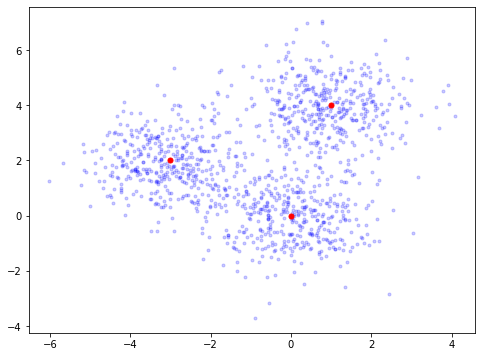

In [2]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12)
num_observations=400

center1=[0,0]
center2=[1,4]
center3=[-3,2]

x1=np.random.multivariate_normal(center1,[[1,0],[0,1]], num_observations)
x2=np.random.multivariate_normal(center2,[[1,0],[0,1]], num_observations)
x3=np.random.multivariate_normal(center3,[[1,0],[0,1]], num_observations)

X= np.vstack((x1, x2, x3)).astype(np.float32)

plt.figure(figsize=(8,6))
plt.plot(X[:,0], X[:,1],".b",alpha=0.2)
plt.plot(center1[0], center1[1], '.', color='red', markersize=10)
plt.plot(center2[0], center2[1], '.', color='red', markersize=10)
plt.plot(center3[0], center3[1], '.', color='red', markersize=10)

**Exercice 1** : Créer un modèle de K-means avec `K=3`, nommé `kmeans1`. Puis entraîner `kmeans1` sur les données `X`.

Indication : On va utiliser `KMeans` de `sklearn.cluster` : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html# (Bien lire l'exemple sur cette page.)

In [3]:
# Réponse pour l'exercice 1





In [3]:
# Correction pour l'exercice 1

from sklearn.cluster import KMeans

kmeans1=KMeans(n_clusters=3)
kmeans1.fit(X)

KMeans(n_clusters=3)

**Exercice 2** : `Print` les `cluster centers` de `model`. Que constatez-vous ?

In [4]:
# Réponse pour l'exercice 2





In [5]:
# Correction pour l'exercice 2

print (kmeans1.cluster_centers_)

# Les clusters centers sont proches des centres des lois normales 
# à partir desquelles on a généré les données. 


[[ 0.07606888 -0.0839324 ]
 [-3.070386    1.917827  ]
 [ 0.91179204  4.009759  ]]


**Exercice 3** : Maintenant on va tracer les cellules de Voronoi générées par les `cluster centers` de l'**Exercice 2** sur les données. 


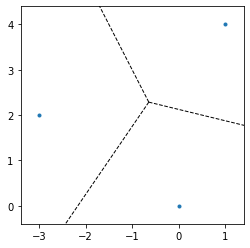

In [6]:
# Indication : Un exemple pour tracer la partition de Voronoi. 

from scipy.spatial import Voronoi, voronoi_plot_2d

points_generer_voronoi = np.array([[0,0],[1,4],[-3,2]])

vor = Voronoi(points_generer_voronoi)

fig, ax = plt.subplots(1,1,figsize=(4,4))  

fig = voronoi_plot_2d(vor, ax=ax, show_vertices=False)

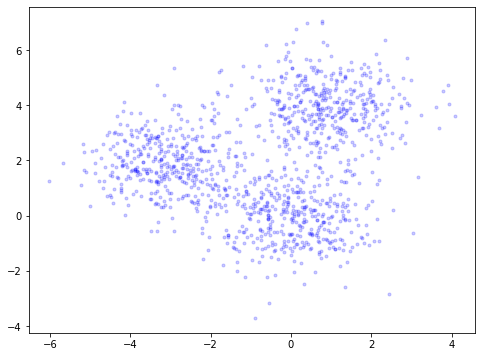

In [7]:
# Réponse pour l'exercice 3


fig, ax = plt.subplots(1,1,figsize=(8,6))  
plt.plot(X[:,0], X[:,1],".b",alpha=0.2)

    #tracer la partition de Voronoi
    #remplir votre code ici
    #remplir votre code ici

plt.show()

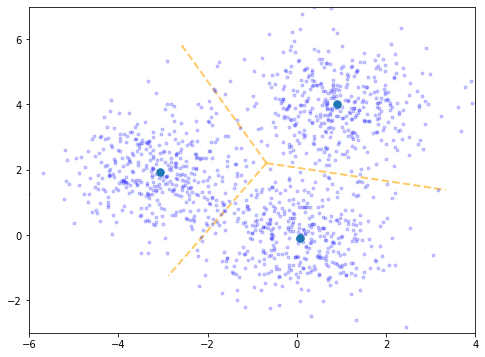

In [8]:
# Correction pour l'exercice 3

fig, ax = plt.subplots(1,1,figsize=(8,6))  

vor = Voronoi(kmeans1.cluster_centers_)

plt.plot(X[:,0], X[:,1],".b",alpha=0.2)

voronoi_plot_2d(vor, ax, show_vertices=False, show_points=True, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=15)

ax.set_xlim([-6, 4])
ax.set_ylim([-3, 7])

plt.show()

--------------------

## 2. Application de K-means : Compression d'image<a class="anchor" id="chapter2"></a> 

Maintenant on va réaliser un exemple d'application de K-means : la compression d'image. On va compresser l'image `zelda.png` dans le dossier de TP7.

(L'image de Zelda qu'on va traiter vient du site : https://www.journaldugeek.com/test/impressions-zelda-breath-of-the-wild-zelda-est-mort/)

D'abord, on va *lire* cette image, i.e. on va transformer l'image en matrice. 

**Exercice 4** :  
1. Lire l'image `zelda.png` en utilisant `plt.imread` et nommer la `image_zelda`.
2. Quel est le type de `image_zelda` i.e. la sortie de `plt.imread` ?

Indication : le package `plt.imread`: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.imread.html

In [9]:
# Réponse pour l'exercice 4






Le type de 'image_zelda' est <class 'numpy.ndarray'>


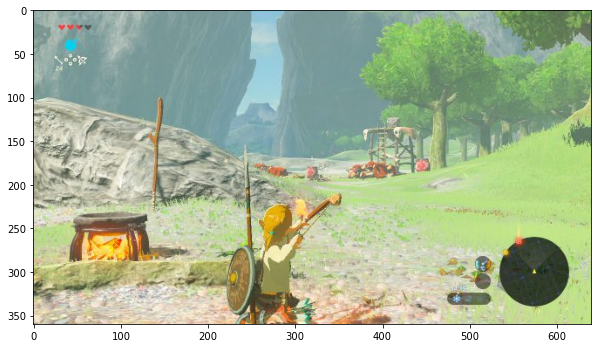

In [9]:
# Correction pour l'exercice 4

# 1. 
image_zelda=plt.imread("zelda.png")
plt.figure(figsize = (10,6))
plt.imshow(image_zelda)

# 2. 
print ("Le type de 'image_zelda' est", type(image_zelda))

**Exercice 5** : Quelle est la dimension de `image_zelda` ? Que signifie la dimension de `image_zelda`?

Indication : RGB (red/rouge green/vert blue/bleu) cube :
https://en.wikipedia.org/wiki/RGB_color_model#/media/File:RGB_color_solid_cube.png

In [9]:
# Réponse pour l'exercice 5





In [11]:
# Correction pour l'exercice 5

print ("La dimension de 'image_zelda' est", image_zelda.shape)

# (360, 640) signifie la taille de cette image; 
# 3 signefie le code de coleur (RGB) sur chaque pixel.

La dimension de 'image_zelda' est (360, 640, 3)


-------------------------------

L'idée de la compression d'image par `K-means` est la suivante : on choisit les $K$ couleurs les plus *représentatives* parmi toutes les couleurs de cette image. Puis on projette la couleur de chaque pixel sur la plus proche couleur représentative. 

On considère les couleurs de chaque pixel de `image_zelda` comme un point dans $\mathbb{R}^3$. On a donc au total $360\times 640$ points dans $\mathbb{R}^3$. Donc ici, "les $K$ couleurs les plus *représentatives*" correspond à choisir les $K$-clusters centers optimaux (une grille de quantification optimale de niveau $K$). 
 
Comme la dimension de `image_zelda` est (360, 640, 3), on doit `reshape` les données en dimention $(360\times640, 3)$ avant d'appliquer `K-means`.

**Exercice 6** : `Reshape` `image_zelda` en dimension $(360\times 640, 3)$. Nommer le nouveau vecteur par `colors`.

Indication: on peut utiliser `np.reshape`. https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [ ]:
# Réponse pour l'exercice 6






In [10]:
# Correction pour l'exercice 6

colors= np.reshape(image_zelda, (image_zelda.shape[0]*image_zelda.shape[1],3))
print (colors.shape)


(230400, 3)


**Exercice 7** : Créer un modèle K-means avec `n_clusters=20`, nommé `compress_model`. Puis entraîner `compress_model` sur `colors` de l'**Exercice 6**. 

(Le temps de calcul est environ 1min.)

In [ ]:
# Réponse pour l'exercice 7




In [12]:
# Correction pour l'exercice 7


compress_model=KMeans(n_clusters=20).fit(colors)


**Exercice 8** : Que siginfient les attributes `compress_model.label_` et ` compress_model.cluster_centers_` ?

Indication : Lire la description de `sklearn.cluster.KMeans`.

In [13]:
print ("1:", compress_model.labels_)
print ("2:", compress_model.labels_.shape)
print ("3:", compress_model.cluster_centers_)
print ("4:", compress_model.cluster_centers_.shape)

1: [2 2 2 ... 1 1 1]
2: (230400,)
3: [[0.40806663 0.48058438 0.35442403]
 [0.7297128  0.8646411  0.5351655 ]
 [0.47598606 0.61112607 0.61046576]
 [0.3748029  0.33052772 0.22756132]
 [0.8341391  0.83242905 0.7283969 ]
 [0.63164514 0.8102403  0.8527615 ]
 [0.53449434 0.73035014 0.4261725 ]
 [0.7330788  0.6911982  0.46332073]
 [0.7377159  0.75886303 0.67260903]
 [0.62350416 0.54995227 0.33872193]
 [0.9586433  0.790468   0.440107  ]
 [0.8769391  0.6043314  0.12970358]
 [0.6694326  0.6996955  0.59163725]
 [0.9156693  0.8913896  0.8009703 ]
 [0.56863046 0.6808323  0.67108506]
 [0.20389736 0.23992172 0.17216036]
 [0.78940743 0.8347311  0.628938  ]
 [0.45078146 0.5817477  0.43000707]
 [0.57049537 0.40254438 0.19141486]
 [0.56659687 0.6145155  0.5139881 ]]
4: (20, 3)


Réponse pour l'exercice 8 :







Correction pour l'exercice 8 : 

1. `compress_model.cluster_centers_` sont les cluster centers, qui signifie les RGB code des couleurs "représentatives".

2. `compress_model.labels_` sont le numéro de cellule du points dans `colors`.


**Exercice 9** : Maintenant on va remplacer les couleurs de chaque pixel par la couleur "représentative" la plus proche. On va stocker les couleurs remplacées dans un nouveau vecteur nommé `color_new`.

In [ ]:
# Réponse pour l'exercice 9 :

import copy
color_new=copy.deepcopy(colors)

labels=compress_model.labels_
centers=compress_model.cluster_centers_

for i in (len(colors)):
    color_new=     #remplir votre code ici

In [14]:
# Correction pour l'exercice 9 : 

import copy
color_new=copy.deepcopy(colors)

labels=compress_model.labels_
centers=compress_model.cluster_centers_

for i in range(len(colors)):
    color_new[i]= centers[labels[i]]   #remplir votre code ici


**Exercice 10** : Quelle est la dimension de `color_new` ? Que-t-on doit faire pour obtenir l'image compressée ? Nommer l'image compressée par `zelda_new`.

In [ ]:
# Réponse pour l'exercice 10 :












La dimension de 'color_new' est  (230400, 3)


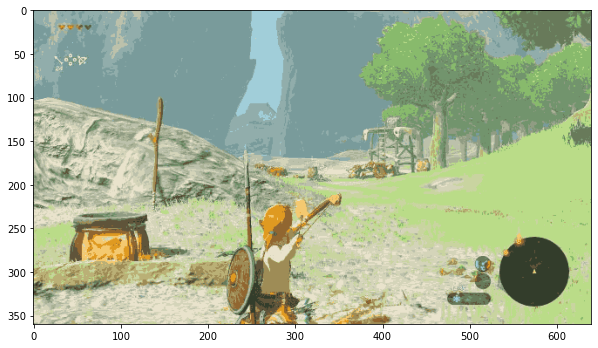

In [15]:
# Correction pour l'exercice 10 : 


print ("La dimension de 'color_new' est ", color_new.shape)

# Pour obtenir l'image compressée, il faut reshape 'color_new' en dimension origniale, 
# c'est-à-dire en dimension (360, 640, 3)


zelda_new=np.reshape(color_new, (image_zelda.shape[0], image_zelda.shape[1],3))

plt.figure(figsize = (10,6))
plt.imshow(zelda_new)


La dernière étape : enregistrer `zelda_new` en fichier .png puis comparer la taille de `zelda_new.png` avec `zelda.png`. 

In [16]:
import matplotlib.image as mpimg
mpimg.imsave("zelda_new.png", zelda_new)

In [17]:
import os
size_new=os.path.getsize('zelda_new.png')
size_old=os.path.getsize('zelda.png')
print ("La taille d'image originale est ", size_old, "bytes.")
print ("La taille d'image compressée est ", size_new, "bytes.")

print ("L'image Zelta a été compressée en ", "{0:.0f}%".format(size_new/size_old*100),"de la taille original" )

La taille d'image originale est  383889 bytes.
La taille d'image compressée est  112012 bytes.
L'image Zelta a été compressée en  29% de la taille original


-------------------------------------------------
Maintenant on va réaliser l'Exemple 4 dans le *Chapitre 1 Introduction* du polycopié. On va transformer une photo du partiel (voir la cellule suivante) en une image en noir et blanc.

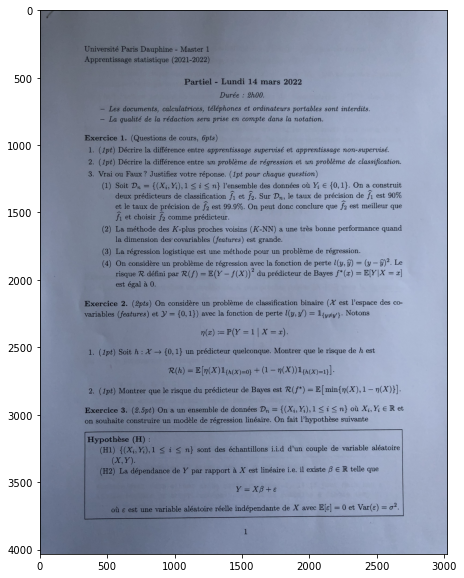

In [34]:
partiel=plt.imread("partiel.png")
plt.figure(figsize = (20,10))
plt.imshow(partiel)

In [21]:
print (partiel.shape)

(4032, 3024, 3)


**Exercice 11** : Les étapes pour changer l'image *partiel.png* en une image en noir et blanc, nommée *partiel_new.png* sont comme suit :

1. Constater la dimension de `partiel`. Sur chaque pixel il y a un vecteur dans $\mathbb{R}^3$ qui représente la couleur ( voir par exemple : https://ufkapano.github.io/scicomppy/week09/plt_colors.html).


2. Créer un nouveau array  `partiel_new` en copiant `partiel`. Pour chaque pixel de `partiel_new`, si la couleur est proche de la couleur noir (noir_rgb=`np.array([0,0,0])`), i.e. la distance entre cette couleur et la couleur noir $N=(0,0,0)$ est inférieure à un certain seuil $\varepsilon$ (par exemple, $\varepsilon=0.5$), on va remplacer cette couleur en couleur noir; sinon, on va remplacer cette couleur en couleur blanc $B=(1,1,1)$ (blanc_rgb=`np.array([1,1,1])`).

    **Remarque:** C'est donc une quantification à une grille fixée  $\big(N=(0,0,0),B=(1,1,1)\big)$ avec la fonction de projection $\text{Proj}_{N\&B}$ définie par 
    
    $\text{Proj}_{N\&B}(\xi):= N\unicode{x1D7D9}_{\mathbf{B}(N,\varepsilon)}(\xi)+B\unicode{x1D7D9}_{\mathbf{B}(N,\varepsilon)^{C}}(\xi)$
    
    et pas la quantification optimale.
    
    (Notation : $\mathbf{B}(x,a)=\Big\{y\in[0,1]^{3}\;\Big|\;|y-x|<=a\Big\}$ est la boule centrée à $x$ et ayant le rayon $a$)
    
    
3. Enregistrer la nouvelle image, nommée *partiel_new.png* et comparer la taille de *partiel.png* et de *partiel_new.png*.

In [ ]:
# Réponse pour l'exercice 11 :

partiel_new=copy.deepcopy(partiel) 

noir_rgb=np.array([0,0,0])
blanc_rgb=np.array([1,1,1])

epsilon=0.5 # seuil

    #remplir votre code ici
    #remplir votre code ici



    


100%|██████████| 4032/4032 [01:26<00:00, 46.47it/s]


La taille d'image originale est  9244591 bytes.
La taille d'image compressée est  249339 bytes.
L'image partiel a été compressée en  3% de la taille original


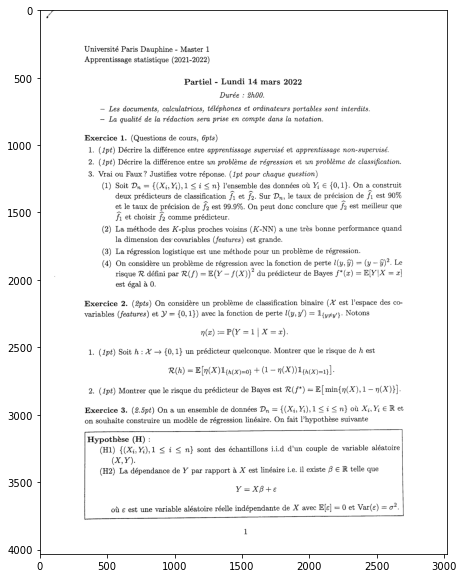

In [35]:
# Correction pour l'exercice 11 : 

partiel_new=copy.deepcopy(partiel) 

noir_rgb=np.array([0,0,0])
blanc_rgb=np.array([1,1,1])

epsilon=0.5 # seuil

from tqdm import tqdm

for i in tqdm(range(partiel.shape[0])):
    for j in range(partiel.shape[1]):
        if np.linalg.norm(partiel[i,j,:]-noir_rgb)<=epsilon:
            partiel_new[i,j,:]=noir_rgb
        else : partiel_new[i,j,:]=blanc_rgb
            
plt.figure(figsize = (20,10))            
plt.imshow(partiel_new)
mpimg.imsave("partiel_new.png", partiel_new)

p_size_new=os.path.getsize('partiel_new.png')
p_size_old=os.path.getsize('partiel.png')
print ("La taille d'image originale est ", p_size_old, "bytes.")
print ("La taille d'image compressée est ", p_size_new, "bytes.")
print ("L'image partiel a été compressée en ", "{0:.0f}%".format(p_size_new/p_size_old*100),"de la taille original" )